In [2]:
from sklearn import linear_model

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'''C:\Users\Muskan\Downloads\ai\student.csv''')


In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
print(df['G3'].unique())

[11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19 20  4]


In [7]:
def result(G3,G1,G2):
    if(G3>8 and G1>8 and G2>8):
        return 'P'
    else:
        return 'F'

In [8]:
df['Pass/Fail']=df.apply(lambda x: result(x['G3'],x['G1'],x['G2']),axis = 1 )

In [9]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,Pass/Fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,Portuguese,F
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,Portuguese,P
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,Portuguese,P
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,Portuguese,P
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,Portuguese,P


In [10]:
df['Pass/Fail'].value_counts()

P    789
F    255
Name: Pass/Fail, dtype: int64

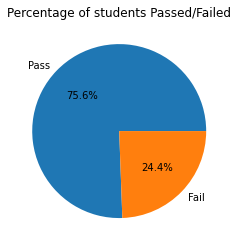

In [34]:
plt.pie(df['Pass/Fail'].value_counts(),labels=['Pass','Fail'],autopct='%1.1f%%')
plt.title('Percentage of students Passed/Failed')
plt.savefig('pie.png', bbox_inches='tight')

In [12]:
df['sex'].value_counts()

F    591
M    453
Name: sex, dtype: int64

In [13]:
print("Percentage of female students passed: {0:.2f}%"
    .format((df[(df['sex']=='F') & (df['Pass/Fail']=='P')].shape[0]/df[df['sex']=='F'].shape[0])*100))

#to find out the percentage of male students passed
print("Percentage of male students passed: {0:.2f}%"
    .format((df[(df['sex']=='M') & (df['Pass/Fail']=='P')].shape[0]/df[df['sex']=='M'].shape[0])*100))

Percentage of female students passed: 75.47%
Percentage of male students passed: 75.72%


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


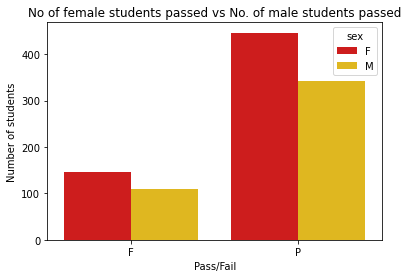

In [35]:
sns.countplot(df['Pass/Fail'],hue = df['sex'],palette="hot")
plt.ylabel('Number of students')
plt.title('No of female students passed vs No. of male students passed')
plt.savefig('malevsfemale', bbox_inches='tight')

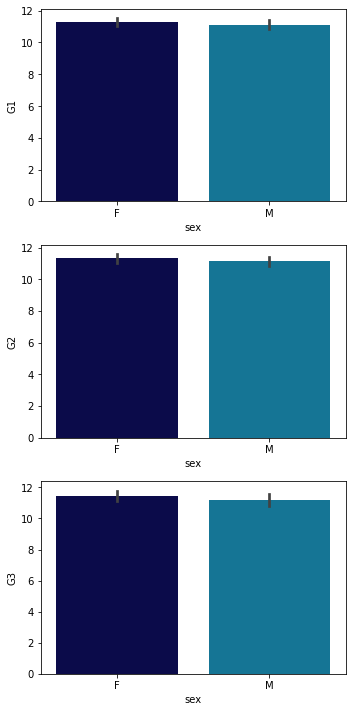

In [15]:
fig,ax = plt.subplots(3,1, figsize = (5,10))
sns.barplot(x=df['sex'],y=df['G1'], ax=ax[0], linewidth=2.5,palette="ocean")
sns.barplot(x=df['sex'],y=df['G2'], ax=ax[1],linewidth=2.5,palette="ocean")
sns.barplot(x=df['sex'],y=df['G3'], ax=ax[2],linewidth=2.5,palette="ocean")
plt.tight_layout()

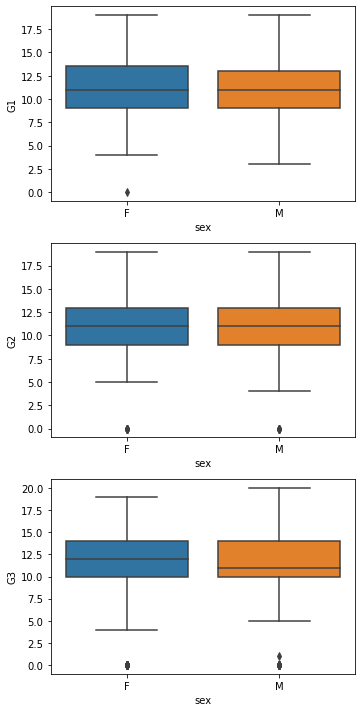

In [16]:
fig,ax = plt.subplots(3,1, figsize = (5,10))
sns.boxplot(x=df['sex'],y=df['G1'],ax=ax[0])
sns.boxplot(x=df['sex'],y=df['G2'],ax=ax[1])
sns.boxplot(x=df['sex'],y=df['G3'],ax=ax[2])
plt.tight_layout()

In [17]:
print("Percentage of students passed with family size less than 3: {0:.2f}%"
    .format((df[(df['famsize']=='LE3') & (df['Pass/Fail']=='P')].shape[0]/df[df['famsize']=='LE3'].shape[0])*100))

print("Percentage of students passed with family size greater than 3: {0:.2f}%"
    .format((df[(df['famsize']=='GT3') & (df['Pass/Fail']=='P')].shape[0]/df[df['famsize']=='GT3'].shape[0])*100))


Percentage of students passed with family size less than 3: 78.76%
Percentage of students passed with family size greater than 3: 74.25%


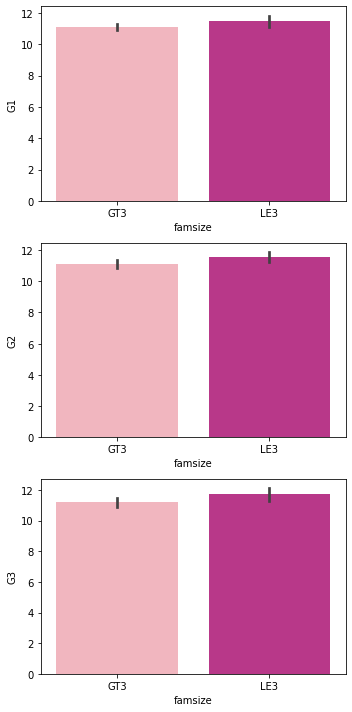

In [18]:
fig,ax = plt.subplots(3,1, figsize = (5,10))
sns.barplot(x=df['famsize'],y=df['G1'], ax=ax[0], linewidth=2.5,palette="RdPu")
sns.barplot(x=df['famsize'],y=df['G2'], ax=ax[1], linewidth=2.5,palette="RdPu")
sns.barplot(x=df['famsize'],y=df['G3'], ax=ax[2], linewidth=2.5,palette="RdPu")
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


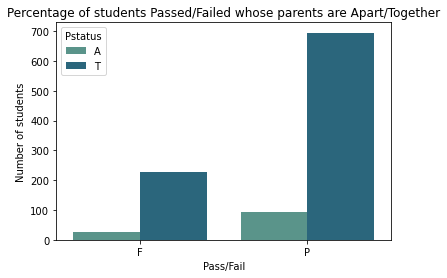

In [36]:
sns.countplot(df['Pass/Fail'],hue = df['Pstatus'],palette="crest")
plt.ylabel('Number of students')
plt.title('Percentage of students Passed/Failed whose parents are Apart/Together')
plt.savefig('aparttogether.png', bbox_inches='tight')

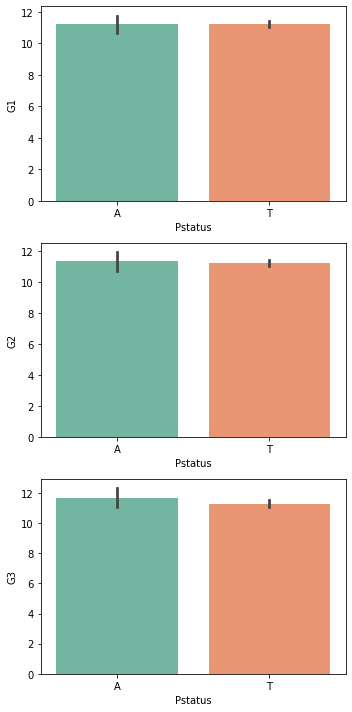

In [20]:
fig,ax = plt.subplots(3,1, figsize = (5,10))
sns.barplot(x=df['Pstatus'],y=df['G1'], ax=ax[0], linewidth=2.5,palette="Set2")
sns.barplot(x=df['Pstatus'],y=df['G2'], ax=ax[1], linewidth=2.5,palette="Set2")
sns.barplot(x=df['Pstatus'],y=df['G3'], ax=ax[2], linewidth=2.5,palette="Set2")
plt.tight_layout()

The number of students passed across the different parental levels of education: 
2    250
3    187
4    184
1    160
0      8
Name: Fedu, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


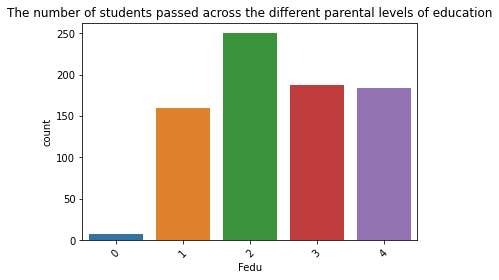

In [38]:
#number of students passed across the parental levels of education 
print("The number of students passed across the different parental levels of education: ")
print(df['Fedu'].loc[df['Pass/Fail']=='P'].value_counts())
sns.countplot(df['Fedu'].loc[df['Pass/Fail']=='P'])
plt.xticks(rotation = 45)
plt.title('The number of students passed across the different parental levels of education')

plt.savefig('fedu.png', bbox_inches='tight')

In [39]:

def correlation(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(20, 15))
    colormap = sns.diverging_palette(240,250, as_cmap=True)
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.savefig('Correlation.png', bbox_inches='tight')
    plt.show()

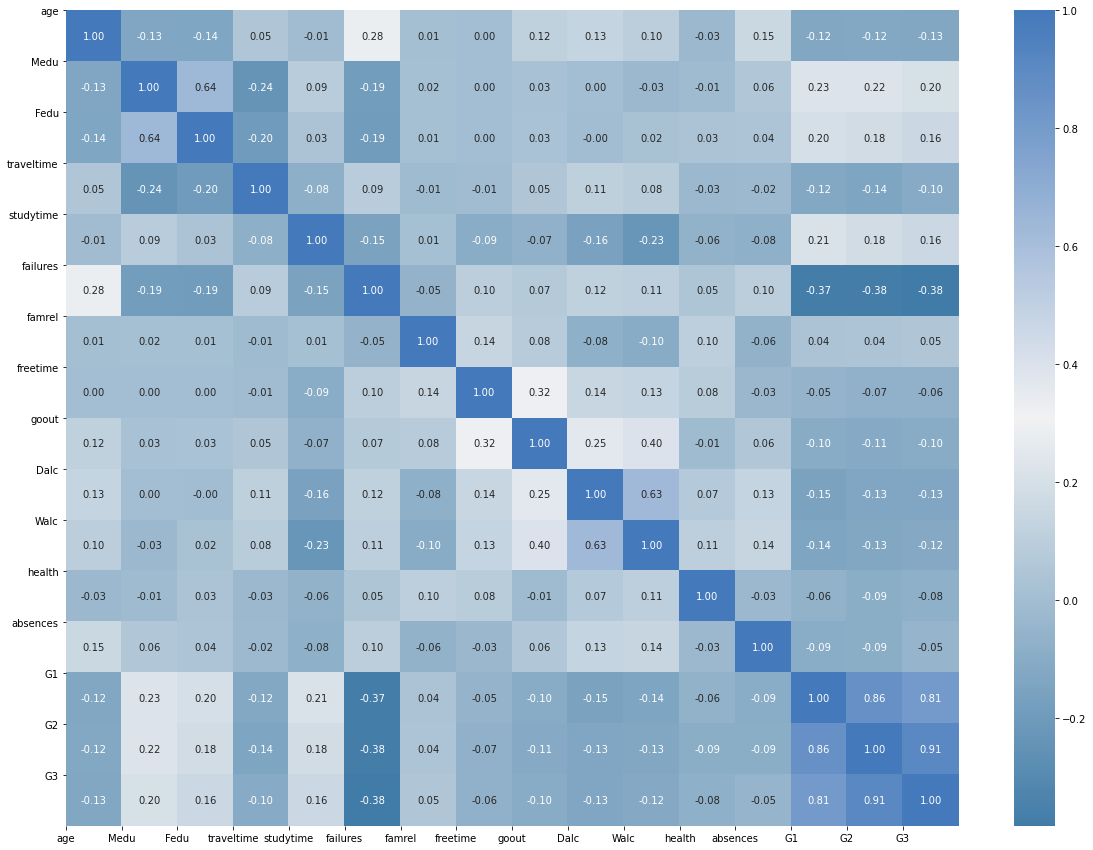

In [23]:
correlation(df)

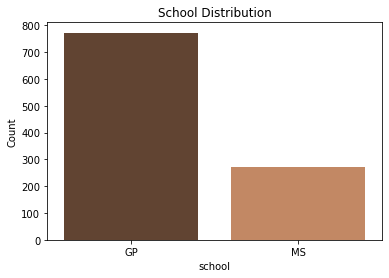

In [24]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'school', data=df, order=['GP','MS'],palette="copper")
ax = ax.set(ylabel="Count", xlabel="school")
figure.grid(False)
plt.title('School Distribution')
plt.savefig('school.png', bbox_inches='tight')

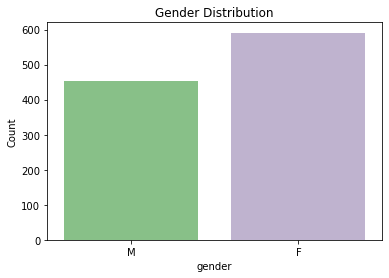

In [25]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'sex', data=df, order=['M','F'],palette="Accent")
ax = ax.set(ylabel="Count", xlabel="gender")
figure.grid(False)
plt.title('Gender Distribution')
plt.savefig('gender.png', bbox_inches='tight')

NameError: name 'title' is not defined

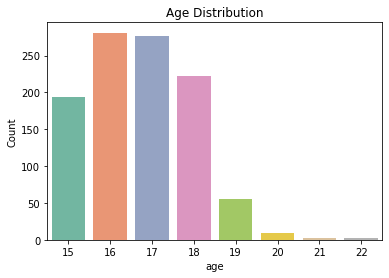

In [31]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'age', data=df, order=[15,16,17,18,19,20,21,22],palette="Set2")
ax = ax.set(ylabel="Count", xlabel="age")
figure.grid(False)
plt.title('Age Distribution')
plt.savefig('age_plot.png', bbox_inches='tight')


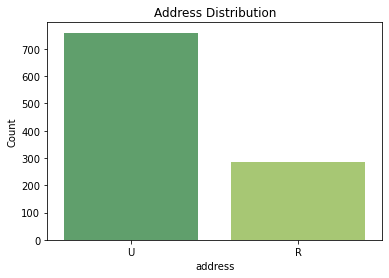

In [26]:

f, ax = plt.subplots()
figure = sns.countplot(x = 'address', data=df, order=['U','R'],palette="summer")
ax = ax.set(ylabel="Count", xlabel="address")
figure.grid(False)
plt.title('Address Distribution')
plt.savefig('address_plot.png', bbox_inches='tight')

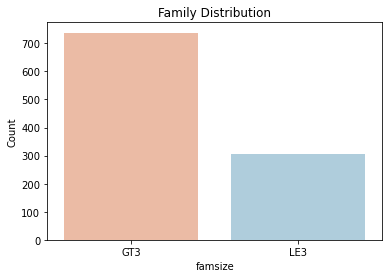

In [27]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'famsize', data=df, order=['GT3','LE3'],palette="RdBu")
ax = ax.set(ylabel="Count", xlabel="famsize")
figure.grid(False)
plt.title('Family Distribution')
plt.savefig('family_plot.png', bbox_inches='tight')

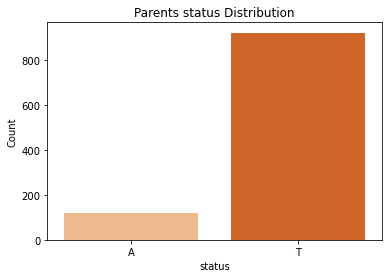

In [28]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Pstatus', data=df, order=['A','T'],palette="Oranges")
ax = ax.set(ylabel="Count", xlabel="status")
figure.grid(False)
plt.title('Parents status Distribution')
plt.savefig('Pstatus_plot.png', bbox_inches='tight')

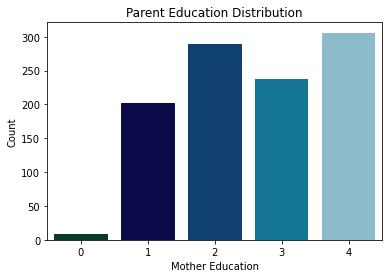

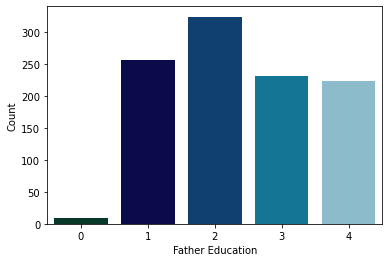

In [29]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Medu', data=df, order=[0,1,2,3,4],palette="ocean")
ax = ax.set(ylabel="Count", xlabel="Mother Education")
figure.grid(False)
plt.title('Parent Education Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'Fedu', data=df, order=[0,1,2,3,4],palette="ocean")
ax = ax.set(ylabel="Count", xlabel="Father Education")
figure.grid(False)
plt.savefig('Parent_Education_plot.png', bbox_inches='tight')


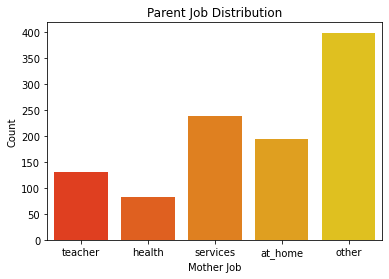

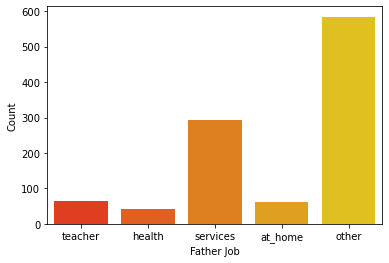

In [30]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Mjob', data=df, order=['teacher','health','services','at_home','other'],palette="autumn")
ax = ax.set(ylabel="Count", xlabel="Mother Job")
figure.grid(False)
plt.title('Parent Job Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'Fjob', data=df, order=['teacher','health','services','at_home','other'],palette="autumn")
ax = ax.set(ylabel="Count", xlabel="Father Job")
figure.grid(False)
plt.savefig('Parent_Job_plot.png', bbox_inches='tight')

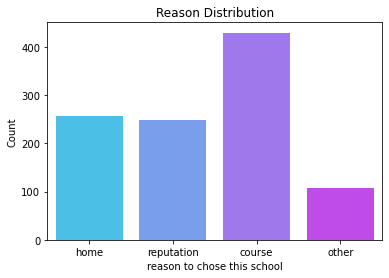

In [31]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'reason', data=df, order=['home','reputation','course','other'],palette="cool")
ax = ax.set(ylabel="Count", xlabel="reason to chose this school")
figure.grid(False)
plt.title('Reason Distribution')
plt.savefig('Reason_plot.png', bbox_inches='tight')

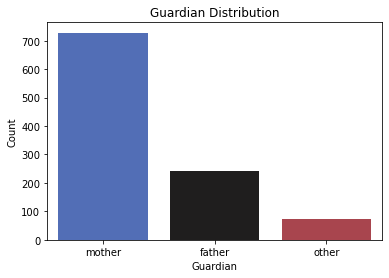

In [32]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'guardian', data=df, order=['mother','father','other'],palette="icefire")
ax = ax.set(ylabel="Count", xlabel="Guardian")
figure.grid(False)
plt.title('Guardian Distribution')
plt.savefig('Guardian_plot.png', bbox_inches='tight')

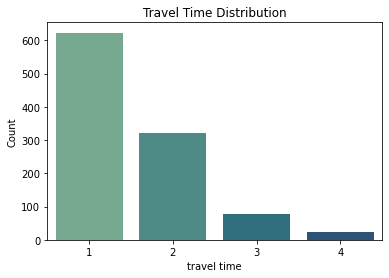

In [33]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'traveltime', data=df, order=[1,2,3,4],palette="crest")
ax = ax.set(ylabel="Count", xlabel="travel time")
figure.grid(False)
plt.title('Travel Time Distribution')
plt.savefig('travel_time_plot.png', bbox_inches='tight')

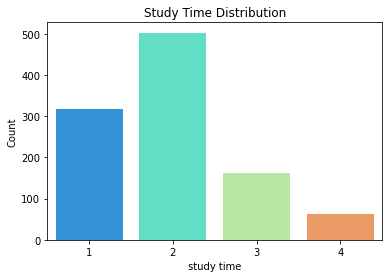

In [34]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'studytime', data=df, order=[1,2,3,4],palette="rainbow")
ax = ax.set(ylabel="Count", xlabel="study time")
figure.grid(False)
plt.title('Study Time Distribution')
plt.savefig('Study_time_plot.png', bbox_inches='tight')

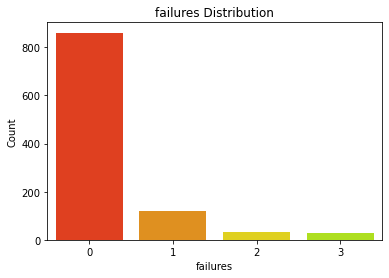

In [35]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'failures', data=df, order=[0,1,2,3],palette="prism")
ax = ax.set(ylabel="Count", xlabel="failures")
figure.grid(False)
plt.title('failures Distribution')
plt.savefig('failures_plot.png', bbox_inches='tight')

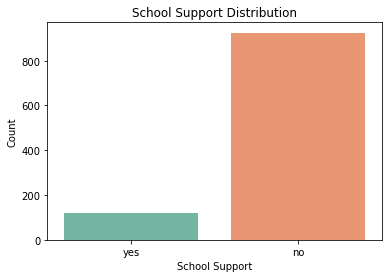

In [36]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'schoolsup', data=df, order=['yes','no'],palette="Set2")
ax = ax.set(ylabel="Count", xlabel="School Support")
figure.grid(False)
plt.title('School Support Distribution')
plt.savefig('school_support_plot.png', bbox_inches='tight')

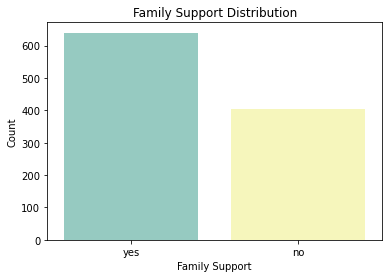

In [37]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'famsup', data=df, order=['yes','no'],palette="Set3")
ax = ax.set(ylabel="Count", xlabel="Family Support")
figure.grid(False)
plt.title('Family Support Distribution')
plt.savefig('Family_support_plot.png', bbox_inches='tight')

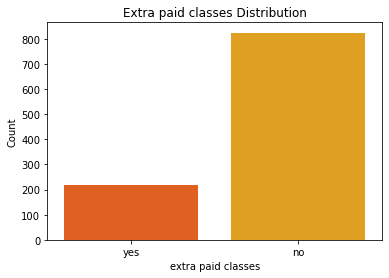

In [38]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'paid', data=df, order=['yes','no'],palette="autumn")
ax = ax.set(ylabel="Count", xlabel="extra paid classes")
figure.grid(False)
plt.title('Extra paid classes Distribution')
plt.savefig('paid_claases_plot.png', bbox_inches='tight')

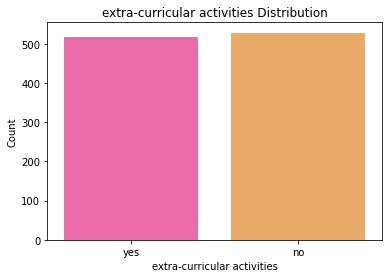

In [39]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'activities', data=df, order=['yes','no'],palette="spring")
ax = ax.set(ylabel="Count", xlabel="extra-curricular activities")
figure.grid(False)
plt.title('extra-curricular activities Distribution')
plt.savefig('extracurricular_plot.png', bbox_inches='tight')


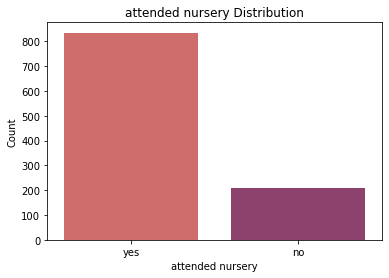

In [40]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'nursery', data=df, order=['yes','no'],palette="flare")
ax = ax.set(ylabel="Count", xlabel="attended nursery")
figure.grid(False)
plt.title('attended nursery Distribution')
plt.savefig('attend_nursery_plot.png', bbox_inches='tight')

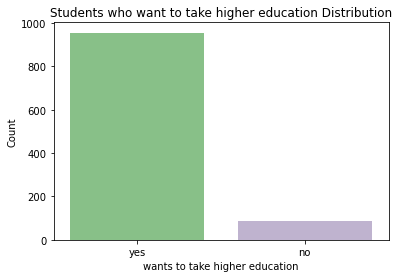

In [41]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'higher', data=df, order=['yes','no'],palette="Accent")
ax = ax.set(ylabel="Count", xlabel="wants to take higher education")
figure.grid(False)
plt.title('Students who want to take higher education Distribution')
plt.savefig('higher_education_plot.png', bbox_inches='tight')

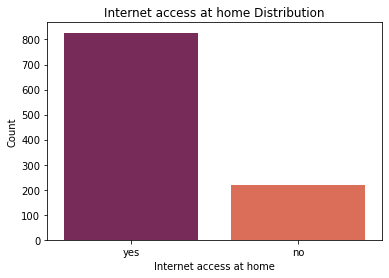

In [42]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'internet', data=df, order=['yes','no'],palette="rocket")
ax = ax.set(ylabel="Count", xlabel="Internet access at home")
figure.grid(False)
plt.title('Internet access at home Distribution')
plt.savefig('school_support_plot.png', bbox_inches='tight')
plt.savefig('internet_plot.png', bbox_inches='tight')

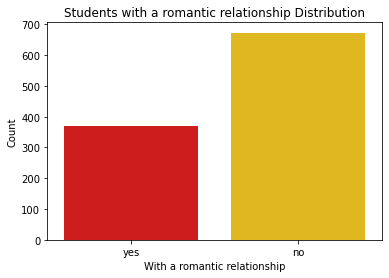

In [43]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'romantic', data=df, order=['yes','no'],palette="hot")
ax = ax.set(ylabel="Count", xlabel="With a romantic relationship")
figure.grid(False)
plt.title('Students with a romantic relationship Distribution')
plt.savefig('rom_relationship_plot.png', bbox_inches='tight')

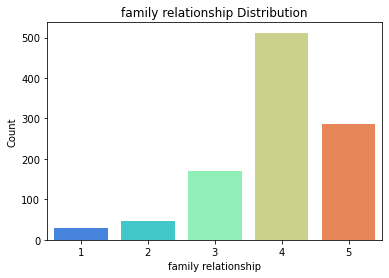

In [44]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'famrel', data=df, order=[1,2,3,4,5],palette="rainbow")
ax = ax.set(ylabel="Count", xlabel="family relationship")
figure.grid(False)
plt.title('family relationship Distribution')
plt.savefig('fam_relationship_plot.png', bbox_inches='tight')

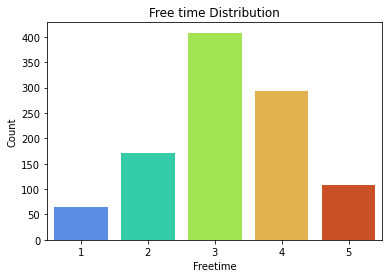

In [45]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'freetime', data=df, order=[1,2,3,4,5],palette="turbo")
ax = ax.set(ylabel="Count", xlabel="Freetime")
figure.grid(False)
plt.title('Free time Distribution')
plt.savefig('free_time_plot.png', bbox_inches='tight')

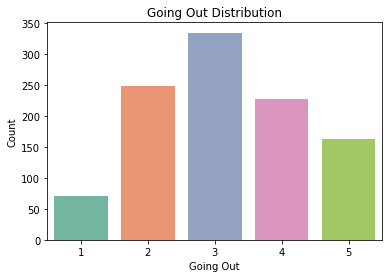

In [46]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'goout', data=df, order=[1,2,3,4,5],palette="Set2")
ax = ax.set(ylabel="Count", xlabel="Going Out")
figure.grid(False)
plt.title('Going Out Distribution')
plt.savefig('Going_out_plot.png', bbox_inches='tight')

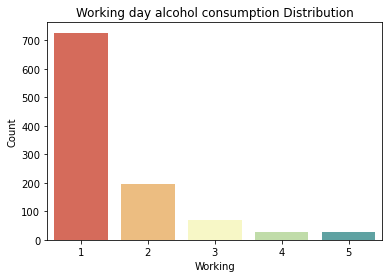

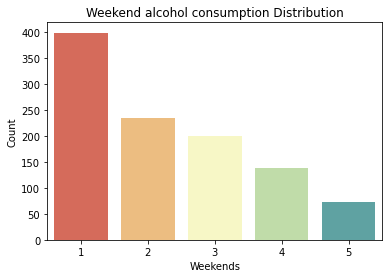

In [47]:
f, ax = plt.subplots()
figure = sns.countplot(x = 'Dalc', data=df, order=[1,2,3,4,5],palette="Spectral")
ax = ax.set(ylabel="Count", xlabel="Working")
figure.grid(False)
plt.title('Working day alcohol consumption Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'Walc', data=df, order=[1,2,3,4,5],palette="Spectral")
ax = ax.set(ylabel="Count", xlabel="Weekends")
figure.grid(False)
plt.title('Weekend alcohol consumption Distribution')
plt.savefig('alcohol_consumption_plot.png', bbox_inches='tight')

In [48]:
df = pd.read_csv(r'''C:\Users\Muskan\Downloads\ai\student.csv''')
df.head()
df['FinalGrade'] = 'na'
df.loc[(df.G3 >= 18) & (df.G3 <= 20), 'FinalGrade'] = 'Excellent'
df.loc[(df.G3 >= 15) & (df.G3 <= 17), 'FinalGrade'] = 'Good' 
df.loc[(df.G3 >= 11) & (df.G3 <= 14), 'FinalGrade'] = 'Average' 
df.loc[(df.G3 >= 6) & (df.G3 <= 10), 'FinalGrade'] = 'Satisfactory' 
df.loc[(df.G3 >= 0) & (df.G3 <= 5), 'FinalGrade'] = 'Poor' 
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,Portuguese,Average
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,Portuguese,Average
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,Portuguese,Average
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,Portuguese,Average
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,Portuguese,Average


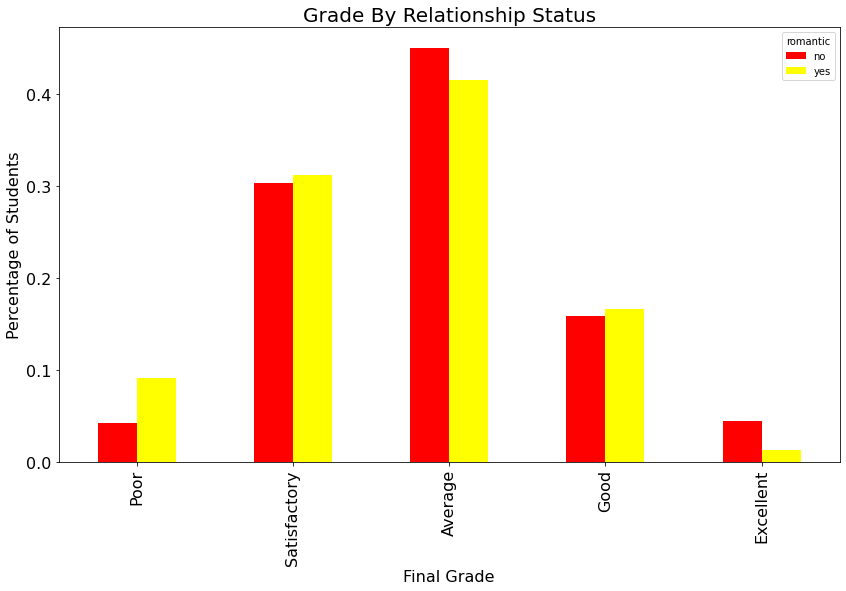

In [49]:
perc = (lambda col: col/col.sum())
index = ['Poor','Satisfactory','Average','Good','Excellent']

relationship_index = pd.crosstab(index=df.FinalGrade, columns=df.romantic)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(colormap='autumn',fontsize=16, figsize=(14,8))
plt.title('Grade By Relationship Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_Relationshipstatus.png', bbox_inches='tight')
plt.show()

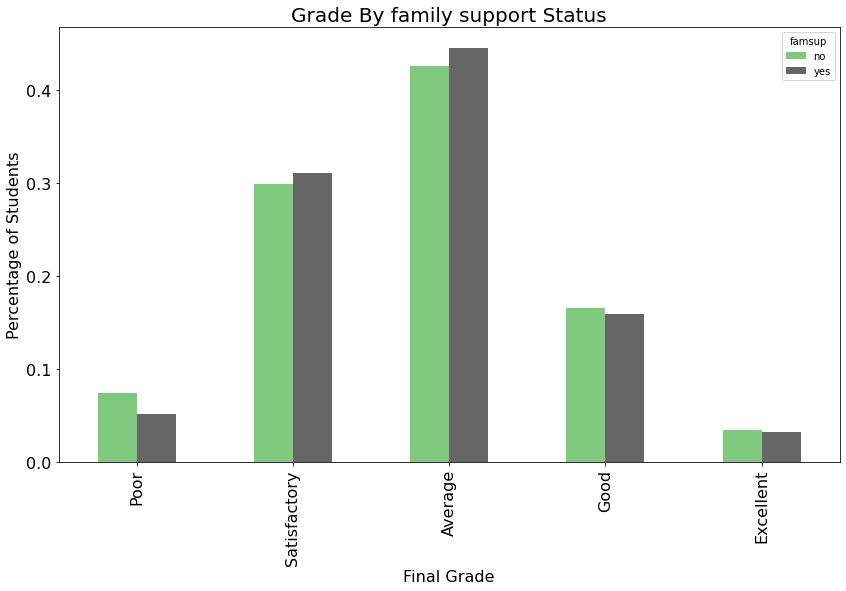

In [50]:
perc = (lambda col: col/col.sum())
index = ['Poor','Satisfactory','Average','Good','Excellent']
relationship_index = pd.crosstab(index=df.FinalGrade, columns=df.famsup)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(colormap='Accent',fontsize=16, figsize=(14,8))
plt.title('Grade By family support Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_family support.png', bbox_inches='tight')
plt.show()

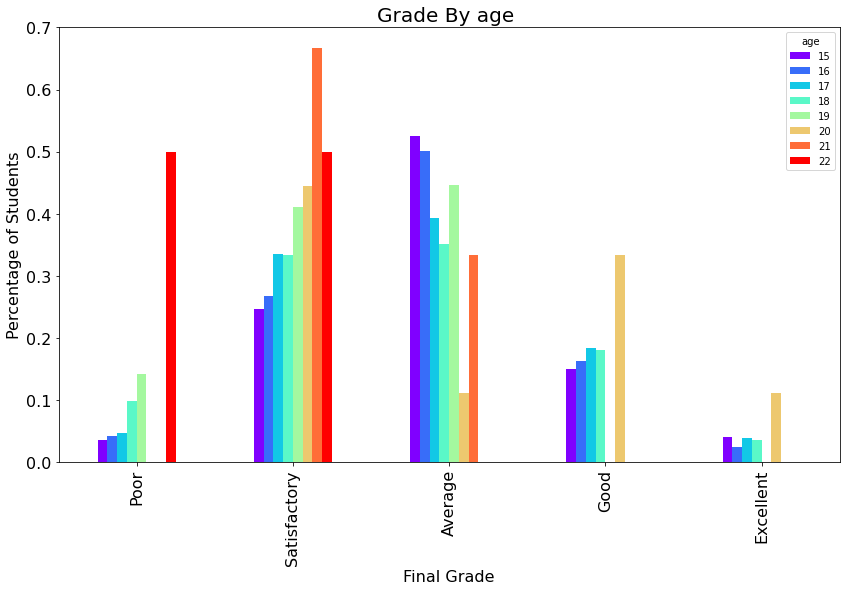

In [51]:
perc = (lambda col: col/col.sum())
index = ['Poor','Satisfactory','Average','Good','Excellent']
relationship_index = pd.crosstab(index=df.FinalGrade, columns=df.age)
romantic_index = relationship_index.apply(perc).reindex(index)
romantic_index.plot.bar(colormap='rainbow',fontsize=16, figsize=(14,8))
plt.title('Grade By age ', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_Age.png', bbox_inches='tight')
plt.show()

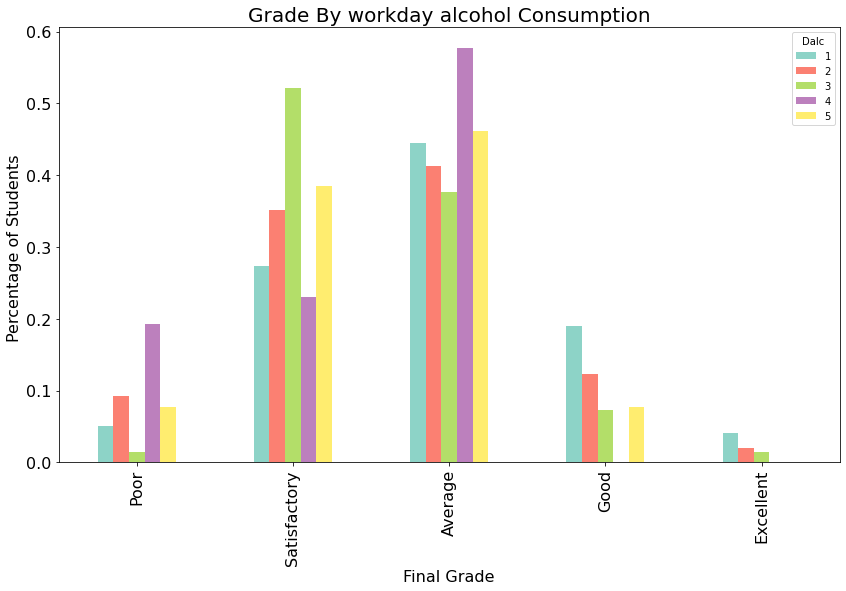

In [52]:
alcohol_index = pd.crosstab(index=df.FinalGrade, columns=df.Dalc)
workday_alcohol_index = alcohol_index.apply(perc).reindex(index)
workday_alcohol_index.plot.bar(colormap='Set3',fontsize=16, figsize=(14,8))
plt.title('Grade By workday alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Students ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_workday_alchol.png', bbox_inches='tight')
plt.show()

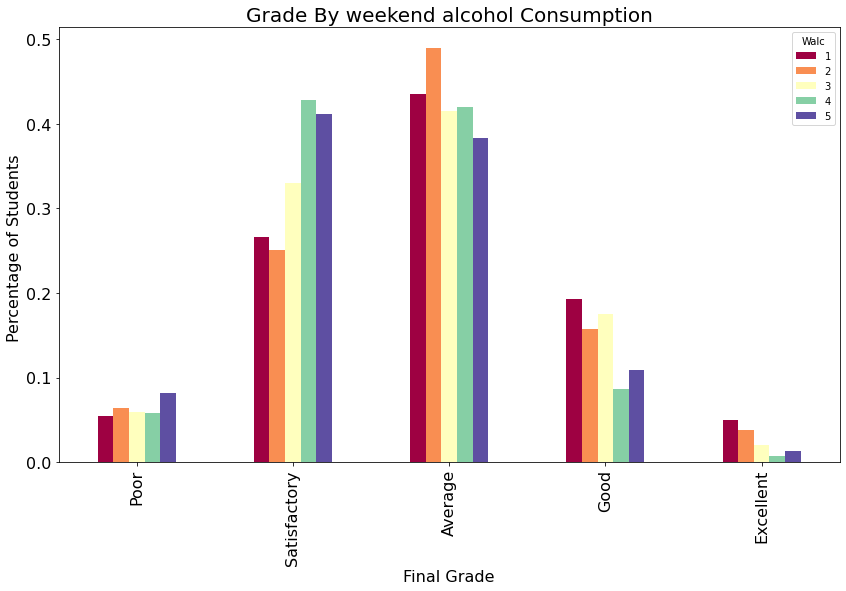

In [53]:
alcohol_index = pd.crosstab(index=df.FinalGrade, columns=df.Walc)
weekend_alcohol_index = alcohol_index.apply(perc).reindex(index)

weekend_alcohol_index.plot.bar(colormap='Spectral',fontsize=16, figsize=(14,8))
plt.title('Grade By weekend alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Students ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_weekend_alchol.png', bbox_inches='tight')
plt.show()


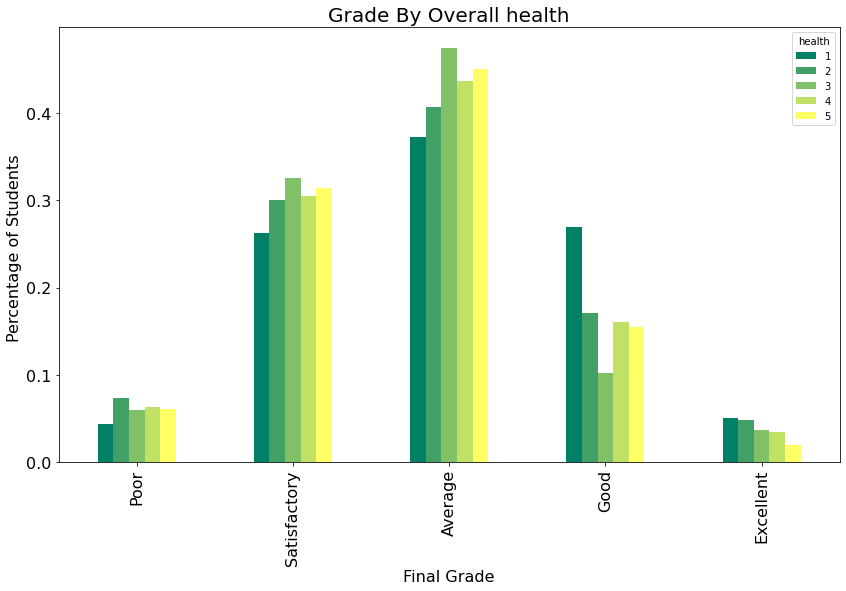

In [54]:
health_index = pd.crosstab(index=df.FinalGrade, columns=df.health)
Overall_health_index = health_index.apply(perc).reindex(index)

Overall_health_index.plot.bar(colormap='summer',fontsize=16, figsize=(14,8))
plt.title('Grade By Overall health', fontsize=20)
plt.ylabel('Percentage of Students ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_overall_health.png', bbox_inches='tight')
plt.show()

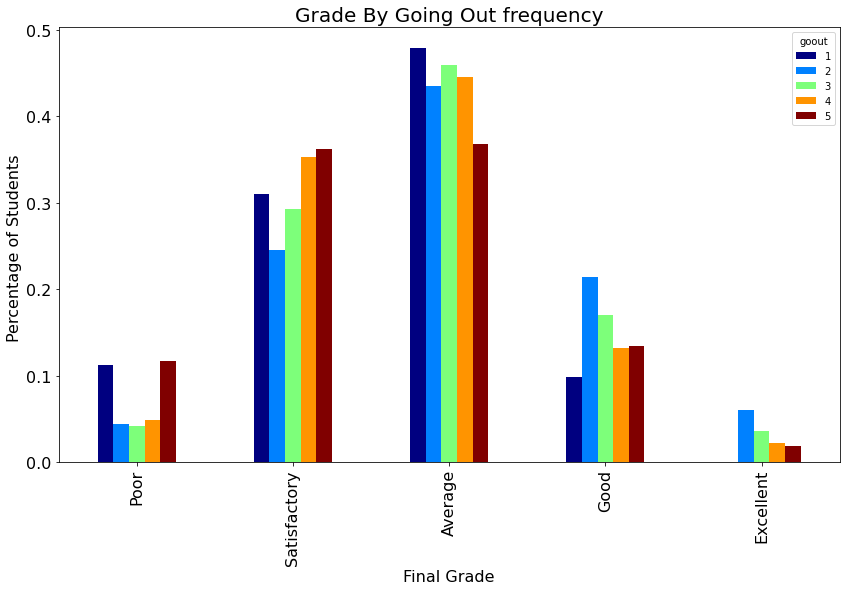

In [55]:
goout_index = pd.crosstab(index=df.FinalGrade, columns=df.goout)
Overall_goout_index = goout_index.apply(perc).reindex(index)
Overall_goout_index.plot.bar(colormap='jet',fontsize=16, figsize=(14,8))
plt.title('Grade By Going Out frequency', fontsize=20)
plt.ylabel('Percentage of Students ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_going_out.png', bbox_inches='tight')
plt.show()

In [56]:
df.head()
df['Regularity'] = 'na'
df.loc[(df.absences >= 0) & (df.absences <= 9), 'Regularity'] = 'Always Regular'
df.loc[(df.absences >= 10) & (df.absences <= 29), 'Regularity'] = 'Mostly Regular' 
df.loc[(df.absences >= 30) & (df.absences <= 49), 'Regularity'] = 'Regular' 
df.loc[(df.absences >= 50) & (df.absences <= 79), 'Regularity'] = 'Irregular' 
df.loc[(df.absences >= 80)& (df.absences <= 93), 'Regularity'] = 'Highly Irregular'
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade,Regularity
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,4,0,11,11,Portuguese,Average,Always Regular
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,2,9,11,11,Portuguese,Average,Always Regular
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,6,12,13,12,Portuguese,Average,Always Regular
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,0,14,14,14,Portuguese,Average,Always Regular
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,0,11,13,13,Portuguese,Average,Always Regular


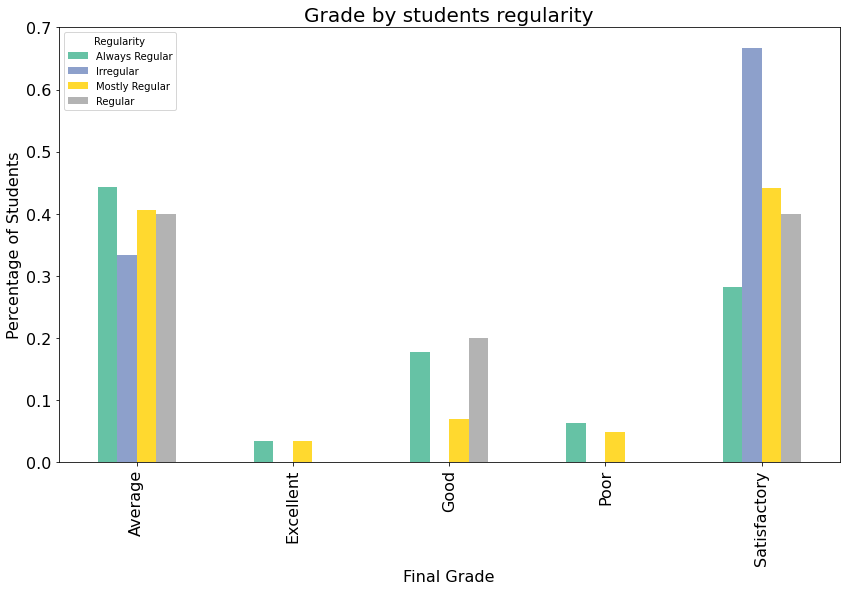

In [57]:
index = ['Poor','Satisfactory','Average','Good','Excellent']
absences = pd.crosstab(index=df.FinalGrade, columns=df.Regularity)
absences = perc(absences)
absences.plot.bar(colormap='Set2',fontsize=16, figsize=(14,8))
plt.title('Grade by students regularity', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_regularity.png', bbox_inches='tight')
plt.show()

In [58]:
df['Grade1'] = 'na'
df.loc[(df.G1 >= 18) & (df.G1 <= 20), 'Grade1'] = 'Excellent'
df.loc[(df.G1 >= 15) & (df.G1 <= 17), 'Grade1'] = 'Good' 
df.loc[(df.G1 >= 11) & (df.G1 <= 14), 'Grade1'] = 'Average' 
df.loc[(df.G1 >= 6) & (df.G1 <= 10), 'Grade1'] = 'Satisfactory' 
df.loc[(df.G1 >= 0) & (df.G1 <= 5), 'Grade1'] = 'Poor' 

df['Grade2'] = 'na'
df.loc[(df.G2 >= 18) & (df.G2 <= 20), 'Grade2'] = 'Excellent'
df.loc[(df.G2 >= 15) & (df.G2 <= 17), 'Grade2'] = 'Good' 
df.loc[(df.G2 >= 11) & (df.G2 <= 14), 'Grade2'] = 'Average' 
df.loc[(df.G2 >= 6) & (df.G2 <= 10), 'Grade2'] = 'Satisfactory' 
df.loc[(df.G2 >= 0) & (df.G2 <= 5), 'Grade2'] = 'Poor' 

df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,0,11,11,Portuguese,Average,Always Regular,Poor,Average
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,2,9,11,11,Portuguese,Average,Always Regular,Satisfactory,Average
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,6,12,13,12,Portuguese,Average,Always Regular,Average,Average
3,GP,F,15,U,GT3,T,4,2,health,services,...,5,0,14,14,14,Portuguese,Average,Always Regular,Average,Average
4,GP,F,16,U,GT3,T,3,3,other,other,...,5,0,11,13,13,Portuguese,Average,Always Regular,Average,Average


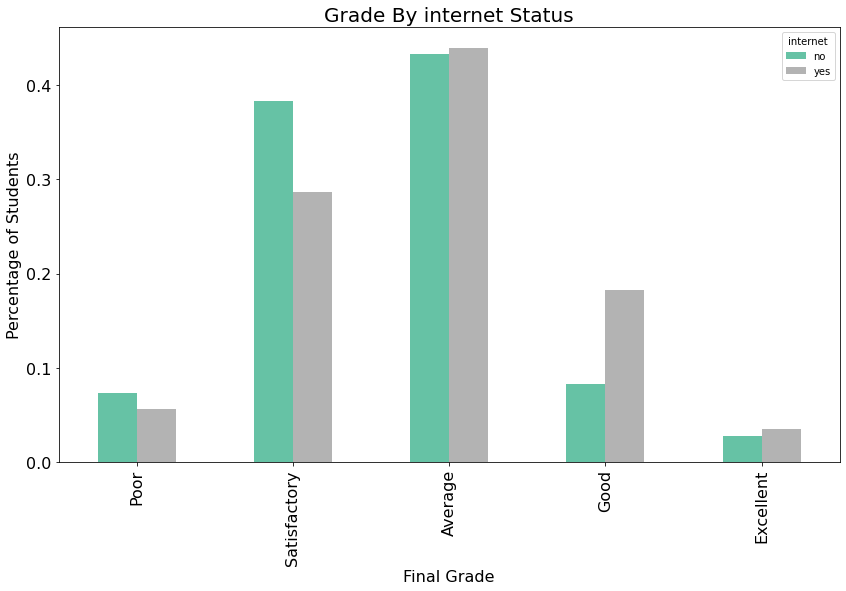

In [59]:
index = ['Poor','Satisfactory','Average','Good','Excellent']
internet_index = pd.crosstab(index=df.FinalGrade, columns=df.internet)
internet_index = internet_index.apply(perc).reindex(index)
internet_index.plot.bar(colormap='Set2',fontsize=16, figsize=(14,8))
plt.title('Grade By internet Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_internet_status.png', bbox_inches='tight')

plt.show()

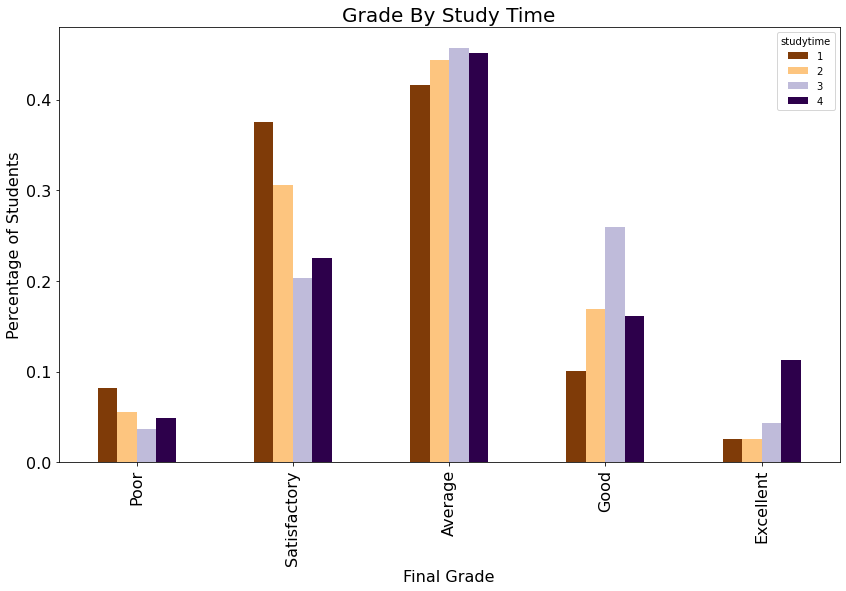

In [60]:
index = ['Poor','Satisfactory','Average','Good','Excellent']
studytime_index = pd.crosstab(index=df.FinalGrade, columns=df.studytime)
studytime_index = studytime_index.apply(perc).reindex(index)
studytime_index.plot.bar(colormap='PuOr',fontsize=16, figsize=(14,8))
plt.title('Grade By Study Time', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_study_time.png', bbox_inches='tight')

plt.show()

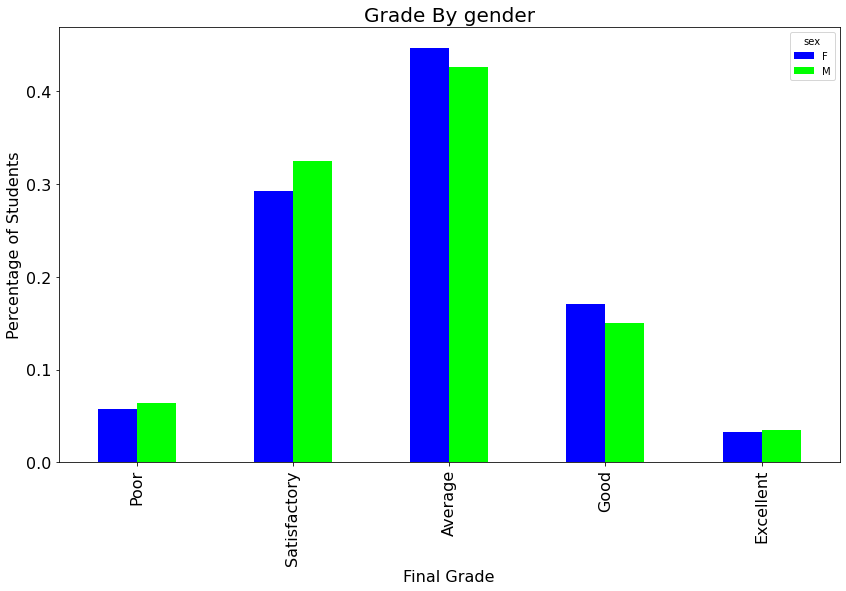

In [61]:
index = ['Poor','Satisfactory','Average','Good','Excellent']
gender_index = pd.crosstab(index=df.FinalGrade, columns=df.sex)
gender_index = gender_index.apply(perc).reindex(index)
gender_index.plot.bar(colormap='brg',fontsize=16, figsize=(14,8))
plt.title('Grade By gender', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_gender.png', bbox_inches='tight')

plt.show()

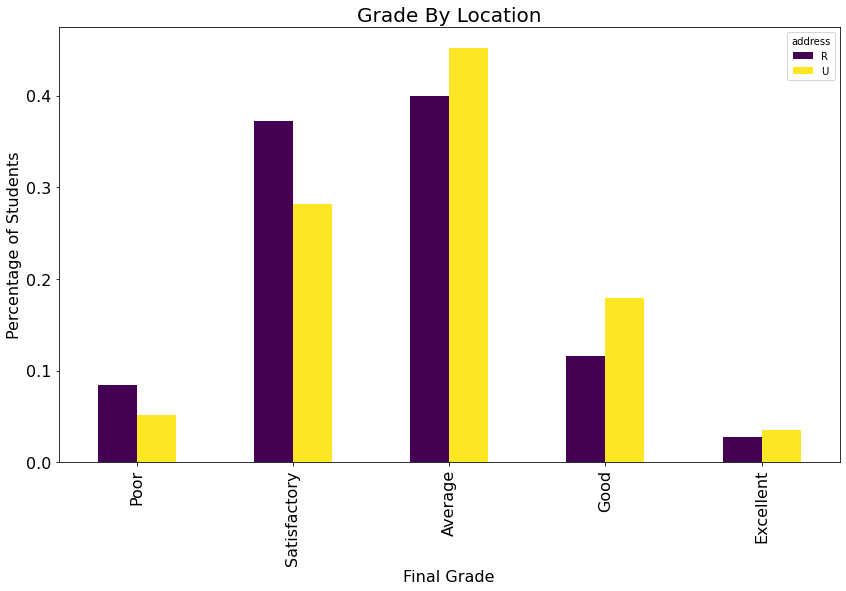

In [62]:
index = ['Poor','Satisfactory','Average','Good','Excellent']
Location_index = pd.crosstab(index=df.FinalGrade, columns=df.address)
Location_index = Location_index.apply(perc).reindex(index)
Location_index.plot.bar(colormap='viridis',fontsize=16, figsize=(14,8))
plt.title('Grade By Location', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_location.png', bbox_inches='tight')

plt.show()

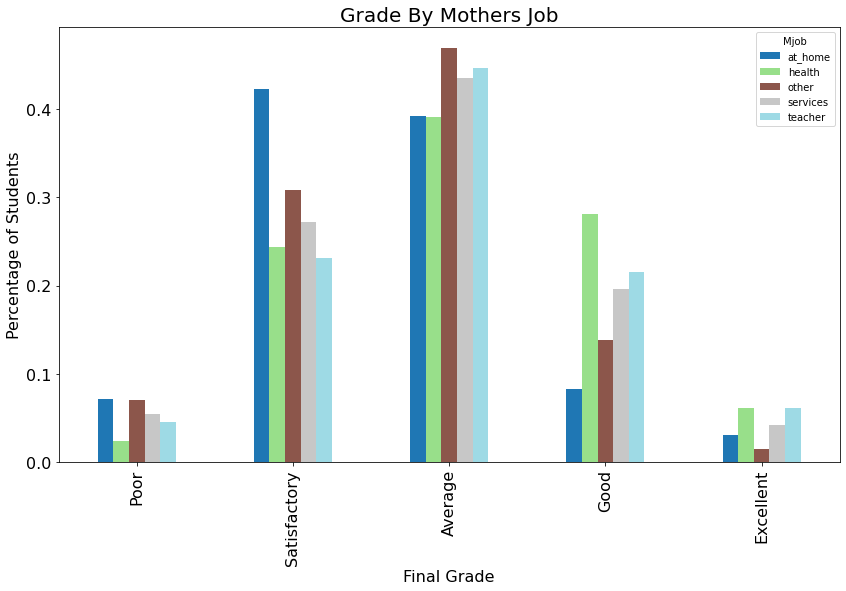

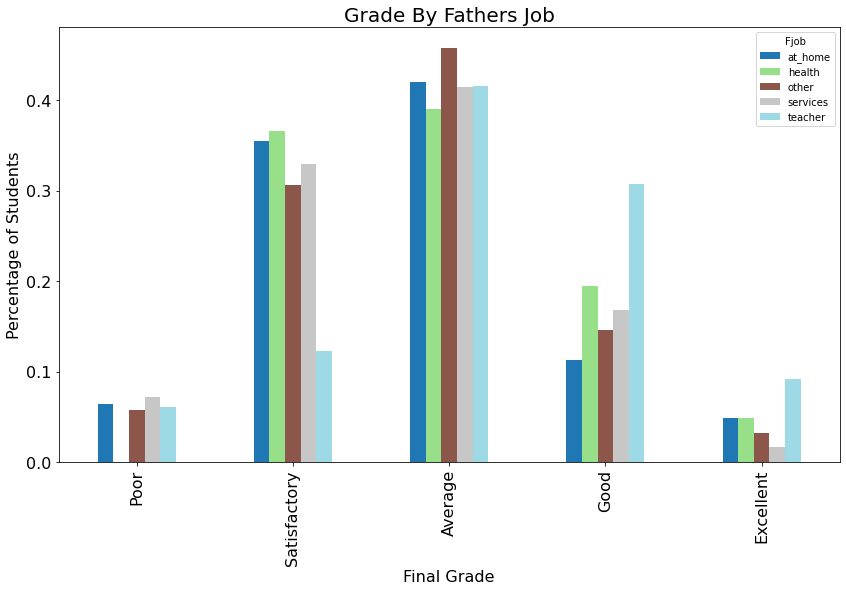

In [63]:
index = ['Poor','Satisfactory','Average','Good','Excellent']
Mothers_index = pd.crosstab(index=df.FinalGrade, columns=df.Mjob)
Mothers_index = Mothers_index.apply(perc).reindex(index)
Mothers_index.plot.bar(colormap='tab20',fontsize=16, figsize=(14,8))
plt.title('Grade By Mothers Job', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_mothers_job.png', bbox_inches='tight')

plt.show()

index = ['Poor','Satisfactory','Average','Good','Excellent']
Fathers_index = pd.crosstab(index=df.FinalGrade, columns=df.Fjob)
Fathers_index = Fathers_index.apply(perc).reindex(index)
Fathers_index.plot.bar(colormap='tab20',fontsize=16, figsize=(14,8))
plt.title('Grade By Fathers Job', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_mothers_fathers_job.png', bbox_inches='tight')

plt.show()

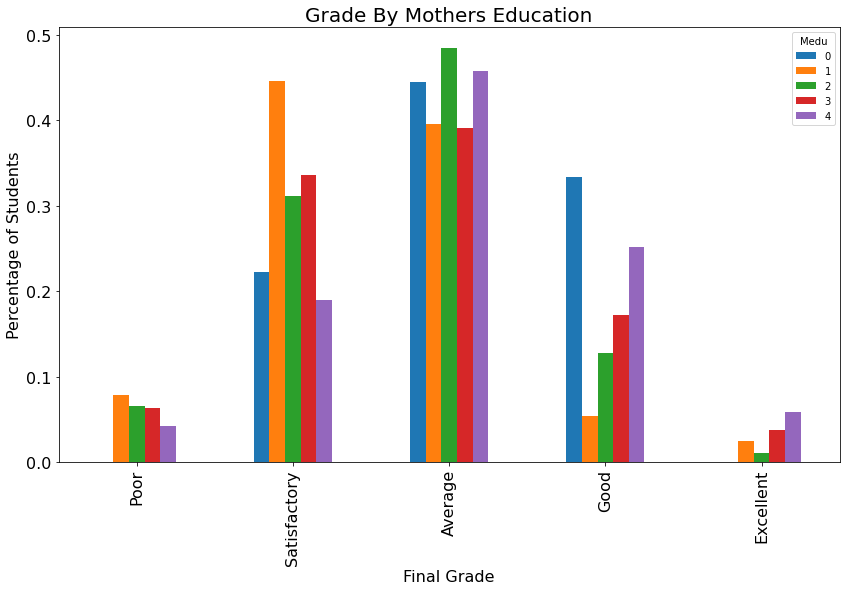

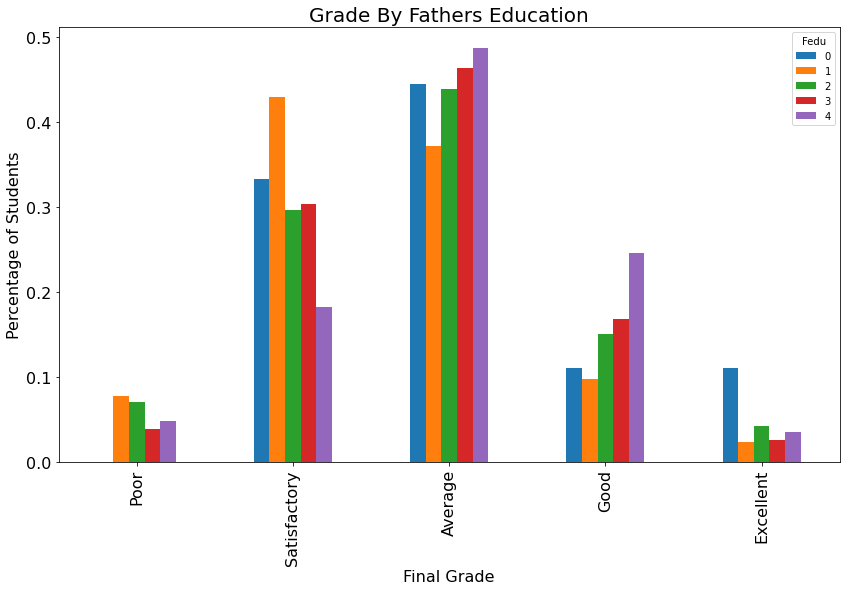

In [64]:

index = ['Poor','Satisfactory','Average','Good','Excellent']
Mothers_index = pd.crosstab(index=df.FinalGrade, columns=df.Medu)
Mothers_index = Mothers_index.apply(perc).reindex(index)
Mothers_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Mothers Education', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_mothers_edu.png', bbox_inches='tight')

plt.show()

index = ['Poor','Satisfactory','Average','Good','Excellent']
Fathers_index = pd.crosstab(index=df.FinalGrade, columns=df.Fedu)
Fathers_index = Fathers_index.apply(perc).reindex(index)
Fathers_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Grade By Fathers Education', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_mothers_fathers_edu.png', bbox_inches='tight')

plt.show()

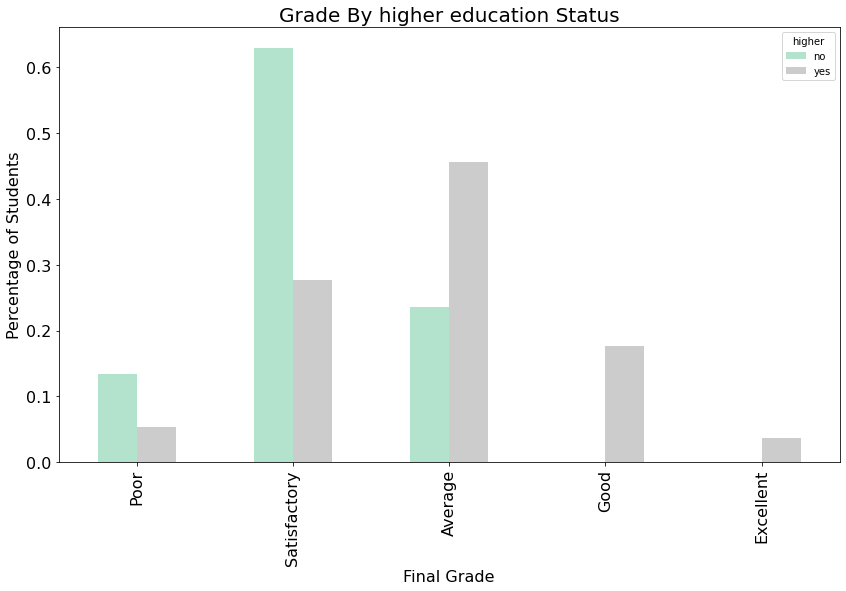

In [65]:
index = ['Poor','Satisfactory','Average','Good','Excellent']
higher_index = pd.crosstab(index=df.FinalGrade, columns=df.higher)
higher_index = higher_index.apply(perc).reindex(index)
higher_index.plot.bar(colormap='Pastel2',fontsize=16, figsize=(14,8))
plt.title('Grade By higher education Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_mhigher_education_status.png', bbox_inches='tight')

plt.show()

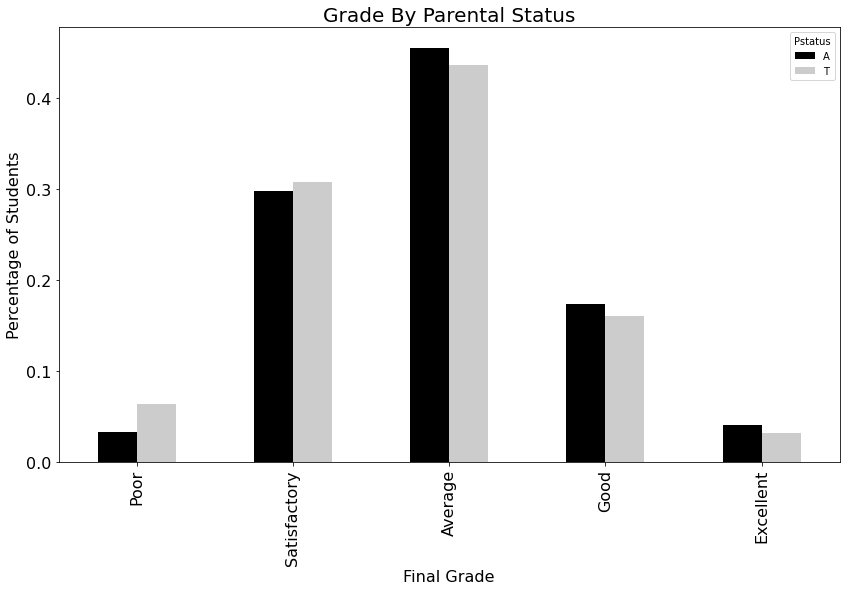

In [66]:
index = ['Poor','Satisfactory','Average','Good','Excellent']
status_index = pd.crosstab(index=df.FinalGrade, columns=df.Pstatus)
status_index = status_index.apply(perc).reindex(index)
status_index.plot.bar(colormap='nipy_spectral',fontsize=16, figsize=(14,8))
plt.title('Grade By Parental Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_Parental_status.png', bbox_inches='tight')

plt.show()

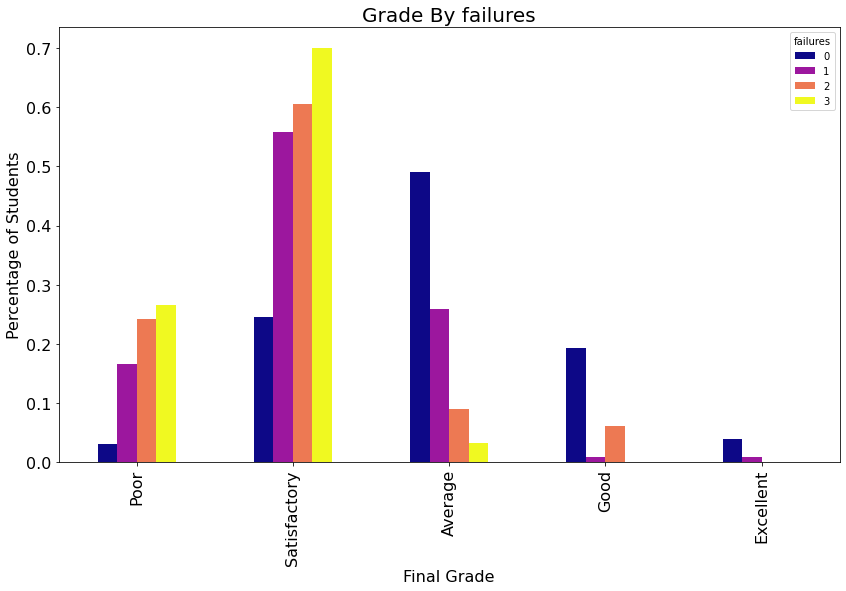

In [67]:

index = ['Poor','Satisfactory','Average','Good','Excellent']
status_index = pd.crosstab(index=df.FinalGrade, columns=df.failures)
status_index = status_index.apply(perc).reindex(index)
status_index.plot.bar(colormap='plasma',fontsize=16, figsize=(14,8))
plt.title('Grade By failures', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_Failure_status.png', bbox_inches='tight')

plt.show()

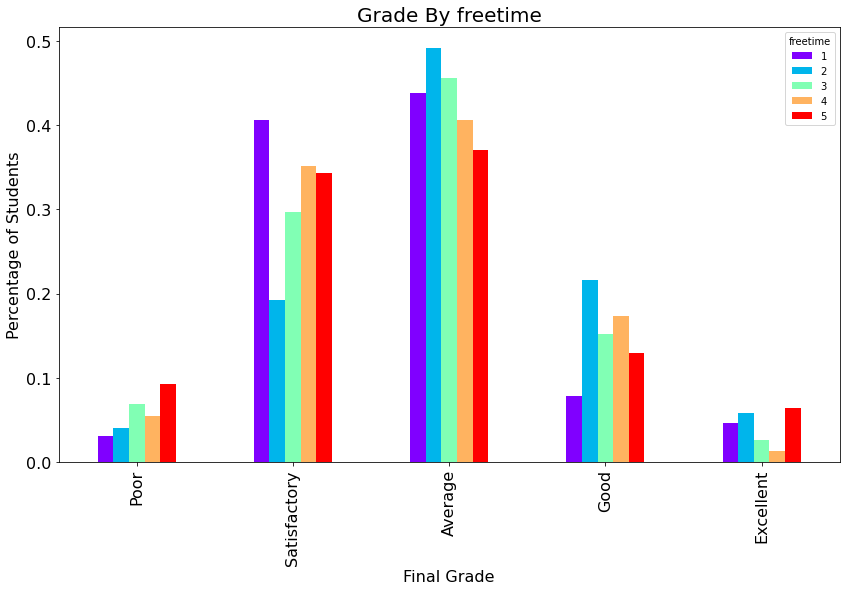

In [68]:
index = ['Poor','Satisfactory','Average','Good','Excellent']
status_index = pd.crosstab(index=df.FinalGrade, columns=df.freetime)
status_index = status_index.apply(perc).reindex(index)
status_index.plot.bar(colormap='rainbow',fontsize=16, figsize=(14,8))
plt.title('Grade By freetime', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.savefig('Grade_freetime_status.png', bbox_inches='tight')

plt.show()